# 问题简述

一年认定为365天(暂时忽略闰年),计算在n个人的小组中至少有两个人的生日相同的概率

# 思路:
$\because$
$$P(至少存在两个人生日相同) = P(两个人生日相同) + P(三个人生日相同) + P(四个人生日相同) + \dots +P(所有人生日相同) = \sum_{i=1}^{n}P(i个人生日相同)$$

$\therefore$
$$太麻烦了,换方法$$


$$P(至少存在两个人生日相同) = 1 - P(任意两个人生日都不相同)$$


$$P(任意两个人生日都不相同) = \frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \dots \times \frac{365-n+1}{365} = \frac{1}{365}\Pi_{i=1}^{n-1}\frac{365-n+1}{365}$$
# 代码
## 计算概率

In [2]:
def birthdayCheck(people):
    p = 1;
    for i in range(people):
        p = p*(365-i)/365
    return 1-p
print(birthdayCheck(30))#括号里修改人数

0.7063162427192686


## 单次模拟
把1月1日到12月31日赋值为1到365

### 步骤一:给人分配生日

In [3]:
import random
def simulation(people):
    birthdays = list()
    peoples = list()
    for i in range(people):
        birthdays.append(random.randint(1,365))
        peoples.append(i)
    return birthdays,peoples

### 步骤二:查看生日是否相同

In [4]:
def tran(z):
    a = [1,31,59,90,120,151,181,212,243,273,304,334]
    str = ''
    for j in z:
        for i in range(len(a)):
            if j < a[i]:
                str += "{}月{}号".format(i,j-a[i-1]+1)
                str += "  |  "
                break
    return str if str != '' else "无"

In [5]:
birthdays,peoples = simulation(30)
import matplotlib.pyplot as plt
def alter(x,y):
    return x, y+3
def getSame(birthdays):
    cnt = 0
    x = list()
    y = list()
    z = list()
    for i in range(len(birthdays)):
        for j in range(i+1,len(birthdays)):
            if birthdays[i] == birthdays[j]:
                cnt += 1
                x.append(i)
                y.append(j)
                z.append(birthdays[i])
    return cnt,x,y,z

cnt,x,y,z = getSame(birthdays)
print(tran(birthdays))
print("有{}组生日相同".format(cnt))
print("重复日期为" + tran(z))
for i in range(len(x)):
    print("第{}人和第{}人生日相同".format(x[i]+1,y[i]+1))

7月28号  |  8月20号  |  6月5号  |  9月17号  |  10月8号  |  6月18号  |  4月30号  |  5月29号  |  8月8号  |  8月9号  |  2月27号  |  5月29号  |  7月29号  |  8月19号  |  5月18号  |  5月16号  |  1月8号  |  8月28号  |  6月14号  |  3月25号  |  4月28号  |  10月23号  |  7月31号  |  5月10号  |  4月2号  |  
有2组生日相同
重复日期为5月29号  |  
第6人和第11人生日相同
第12人和第16人生日相同


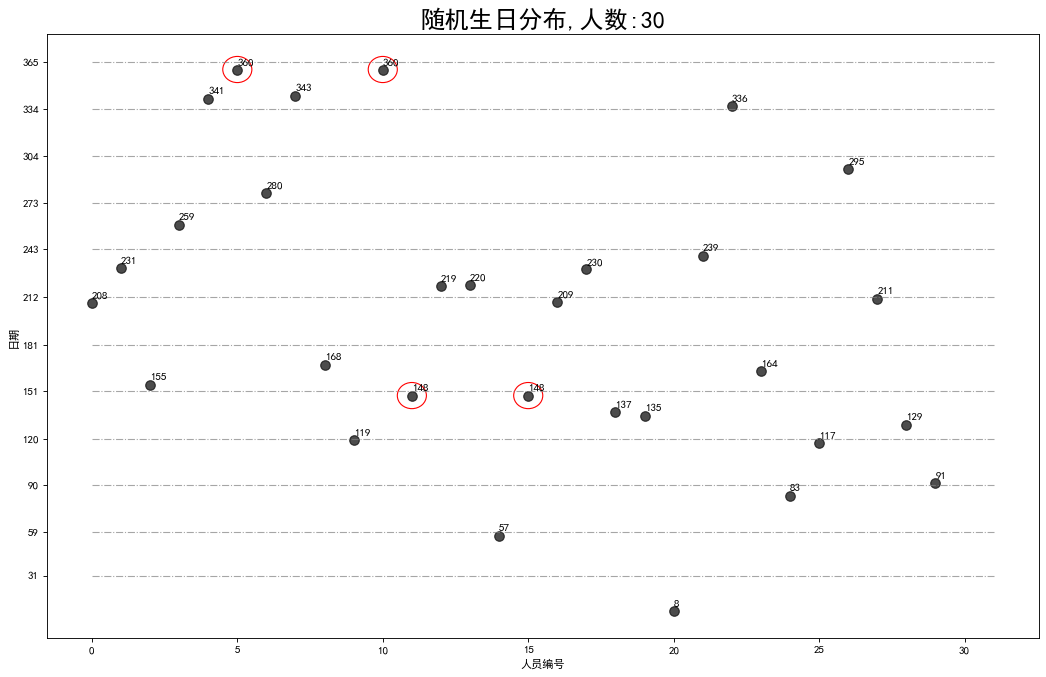

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Ellipse
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=[31,59,90,120,151,181,212,243,273,304,334,365], xmin=0, xmax=len(peoples)+1, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=birthdays, x=peoples, s=75, color='black', alpha=0.7)

mpl.rcParams['font.sans-serif']=['SimHei']

# Title, Label, Ticks and Ylim
ax.set_title('随机生日分布,人数:{}'.format(len(peoples)), fontdict={'size':22})
ax.set_xlabel('人员编号')
ax.set_ylabel('日期')
ax.set_yticklabels = ['一月','二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月']
ax.set_yticks([31,59,90,120,151,181,212,243,273,304,334,365])
for i in range(len(birthdays)):
    textx,texty = alter(peoples[i],birthdays[i])
    ax.text(textx,texty,birthdays[i])
if cnt != 0:
    for i in range(len(x)):
        plt.gcf().gca().add_artist(Ellipse(xy = (x[i],z[i]), width = 1, height = 17, fill = False, color = "red"))
        plt.gcf().gca().add_artist(Ellipse(xy = (y[i],z[i]), width = 1, height = 17, fill = False, color = "red"))
ax.set_xlim()
plt.show()

由于字体问题,如果使用google colab运行,使用下面代码,否则中文汉字因为没有字体导致乱码

In [ ]:
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='SimHei .ttf')
from matplotlib.patches import Ellipse
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=[31,59,90,120,151,181,212,243,273,304,334,365], xmin=0, xmax=len(peoples)+1, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=birthdays, x=peoples, s=75, color='black', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('随机生日分布,人数:{}'.format(len(peoples)), fontdict={'size':22},fontproperties=zhfont)
ax.set_xlabel('人员编号',fontproperties=zhfont)
ax.set_ylabel('日期',fontproperties=zhfont)
ax.set_yticklabels(['一月','二月','三月','四月','五月','六月','七月','八月','九月','十月','十一月','十二月'], fontproperties = zhfont)
ax.set_yticks([31,59,90,120,151,181,212,243,273,304,334,365])
for i in range(len(birthdays)):
    textx,texty = alter(peoples[i],birthdays[i])
    ax.text(textx,texty,birthdays[i])
if cnt != 0:
    for i in range(len(x)):
        plt.gcf().gca().add_artist(Ellipse(xy = (x[i],z[i]), width = 1, height = 17, fill = False, color = "red"))
        plt.gcf().gca().add_artist(Ellipse(xy = (y[i],z[i]), width = 1, height = 17, fill = False, color = "red"))
ax.set_xlim()
plt.show()

## 固定人数,n次模拟近似概率:

方便起见,先把上面的一坨封装为一个函数

In [25]:
import random
def simulation(people):
    birthdays = list()
    peoples = list()
    for i in range(people):
        birthdays.append(random.randint(1,365))
        peoples.append(i)
    return birthdays,peoples
def tran(z):
    a = [1,31,59,90,120,151,181,212,243,273,304,334]
    str = ''
    for j in z:
        for i in range(len(a)):
            if j < a[i]:
                str += "{}月{}号".format(i,j-a[i-1]+1)
                str += "  |  "
                break
    return str if str != '' else "无"
birthdays,peoples = simulation(30)
import matplotlib.pyplot as plt
def alter(x,y):
    return x, y+3
def getSame(birthdays):
    cnt = 0
    x = list()
    y = list()
    z = list()
    for i in range(len(birthdays)):
        for j in range(i+1,len(birthdays)):
            if birthdays[i] == birthdays[j]:
                cnt += 1
                x.append(i)
                y.append(j)
                z.append(birthdays[i])
    return cnt,x,y,z

cnt,x,y,z = getSame(birthdays)
print(tran(birthdays))
print("有{}组生日相同".format(cnt))
print("重复日期为" + tran(z))
for i in range(len(x)):
    print("第{}人和第{}人生日相同".format(x[i]+1,y[i]+1))

def one_simulation(people):
    birthdays,peoples = simulation(people)
    cnt,x,y,z = getSame(birthdays)
    return cnt
    

10月31号  |  6月24号  |  9月29号  |  6月26号  |  10月6号  |  7月6号  |  9月6号  |  7月26号  |  2月2号  |  2月22号  |  6月4号  |  8月12号  |  5月11号  |  5月4号  |  8月13号  |  9月21号  |  9月11号  |  10月27号  |  5月12号  |  3月18号  |  1月30号  |  10月28号  |  6月18号  |  3月27号  |  1月28号  |  5月22号  |  
有0组生日相同
重复日期为无


封装后,one_simulation函数就是一次生日模拟,现在把人数固定,重复1000次

In [52]:
def multi_simulation(times,people):
    cnt_list = list()
    cnt_check = list()
    for i in range(times):
        cnt = one_simulation(people)
        cnt_list.append(cnt)
        cnt_check.append(0 if cnt ==0 else 1)
    return cnt_list, cnt_check
cnt_list, cnt_check = multi_simulation(1000,30)

### 数据可视化:
#### 有几组人生日相同表

In [64]:

def find_class(list1):
    classes = list()
    for i in list(set(list1)):
        temp_cnt= 0
        for j in list1:
            if i==j:
                temp_cnt += 1
        classes.append(temp_cnt)
    if len(classes) == 1:
        classes.append(classes[0])
        classes[0] = 0
    return classes


[0, 1, 2, 3, 4, 5, 6, 8]
[253, 397, 227, 87, 28, 6, 1, 1]


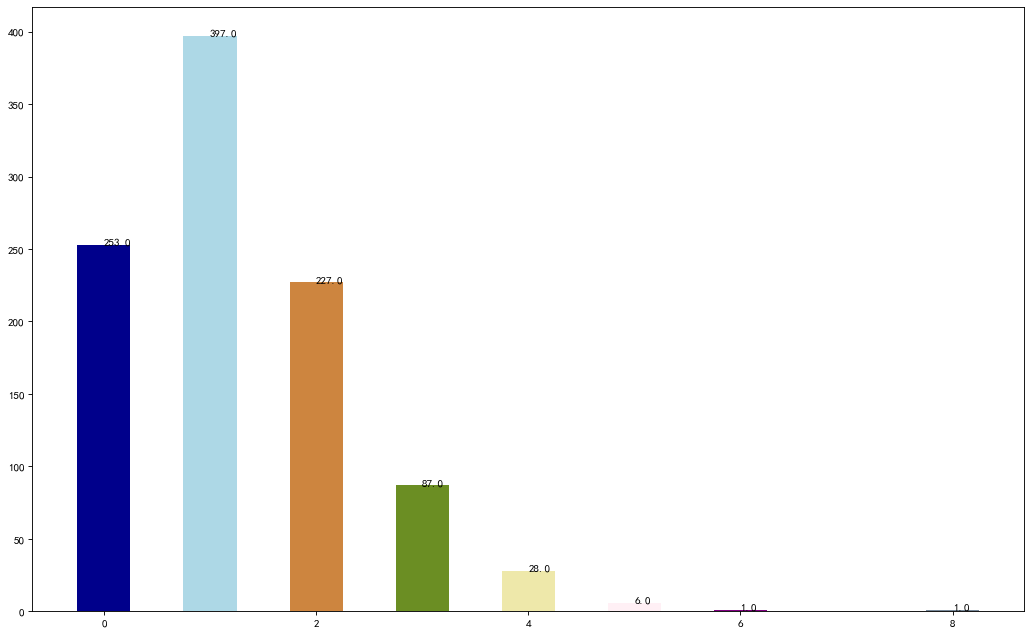

In [54]:
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=len(list(set(cnt_list))))
print(list(set(cnt_list)))
print(find_class(cnt_list))
# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(list(set(cnt_list)), find_class(cnt_list), color=c, width=.5)
for i in range(len(list(set(cnt_list)))):
    plt.text(list(set(cnt_list))[i],find_class(cnt_list)[i], float(find_class(cnt_list)[i]))

存在生日相同次数表

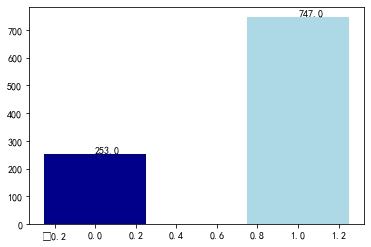

In [55]:
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=len(list(set(cnt_list))))
# Plot Bars
plt.bar(list(set(cnt_check)), find_class(cnt_check), color=c, width=.5)
for i in range(len(list(set(cnt_check)))):
    plt.text(list(set(cnt_check))[i],find_class(cnt_check)[i] + 4, float(find_class(cnt_check)[i]))

这个表是1000次的,现在扩充到其他次数(1,5,10,50,100,500,1000,5000,10000)

Text(10, 0.7563162427192687, '预期值')

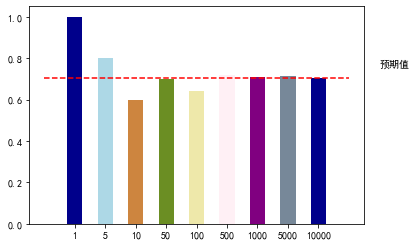

In [98]:
import numpy as np
people = 30
target_times = [1,5,10,50,100,500,1000,5000,10000]
results = list()
for i in target_times:
    cnt_list, cnt_check = multi_simulation(i,people)
    results.append(find_class(cnt_check)[1]/i)
plt.bar(np.arange(len(target_times)), results, color=c, width=.5)
plt.gca().set_xticks(np.arange(len(target_times)),)
plt.gca().set_xticklabels(["1","5","10","50","100","500","1000","5000","10000"])
plt.plot(np.arange(-1,len(target_times)+1),[birthdayCheck(people),birthdayCheck(people),birthdayCheck(people),birthdayCheck(people),birthdayCheck(people),birthdayCheck(people),birthdayCheck(people),birthdayCheck(people),birthdayCheck(people),birthdayCheck(people),birthdayCheck(people)],'r--')
plt.text(len(target_times)+1,birthdayCheck(people)+0.05,"预期值")

再狠一点

TypeError: only size-1 arrays can be converted to Python scalars

Text(19, 0.7563162427192687, '预期值')

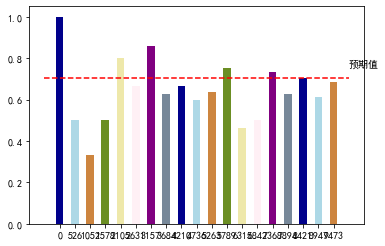

In [202]:
import numpy as np
people = 30
target_times = np.arange(1,20)
temp = 10000/len(target_times)
results = list()
fig,ax=plt.subplots()
for i in target_times:
    cnt_list, cnt_check = multi_simulation(i,people)
    results.append(find_class(cnt_check)[1]/i)
plt.bar(np.arange(len(target_times)), results, color=c, width=.5)
plt.gca().set_xticks(np.arange(len(target_times)))
plt.gca().set_xticklabels(np.array(np.arange(0,10000,temp),dtype = "int16"))
y = list()
for i in range(len(target_times)+2):
    y.append(birthdayCheck(people))
plt.plot(np.arange(-1,len(target_times)+1),y,'r--')
plt.text(len(target_times),birthdayCheck(people)+0.05,"预期值")

In [ ]:
import numpy as np
people = 30
target_times = np.arange(9000,10000,20)
temp = 10000/len(target_times)
results = list()
fig,ax=plt.subplots()
for i in target_times:
    cnt_list, cnt_check = multi_simulation(i,people)
    results.append(find_class(cnt_check)[1]/i)
plt.bar(np.arange(len(target_times)), results, color=c, width=.5)
plt.gca().set_xticks(np.arange(len(target_times)))
plt.gca().set_xticklabels(np.array(np.arange(0,10000,temp),dtype = "int16"))
y = list()
for i in range(len(target_times)+2):
    y.append(birthdayCheck(people))
plt.plot(np.arange(-1,len(target_times)+1),y,'r--')
plt.text(len(target_times),birthdayCheck(people)+0.05,"预期值")

### 近似概率约等于

In [228]:
find_class(cnt_check)[1]/len(cnt_check)

0.7166

## 进一步做n次模拟

In [101]:
def get_ratio(people, times):
    cnt_list1, cnt_check1 = multi_simulation(times,people)
    return(find_class(cnt_check1)[1]/len(cnt_check1))
get_ratio(30,1000)

0.714

In [130]:
def multi_fixed_simulation(people,times, iter_times):
    results = list()
    for i in range(iter_times):
        results.append(get_ratio(people,times))
        if i % 100 == 0:
            print(i)
    return results,people, times


0
100
200
300
400
500
600
700
800
900
0.014419922017819648


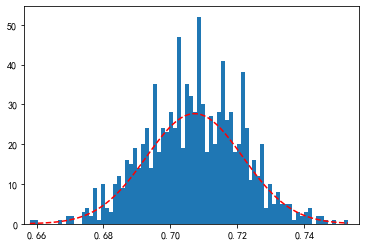

In [157]:
import matplotlib
import scipy.stats as stats
import numpy as np
results_30 = multi_fixed_simulation(30,1000,1000)
mu = np.mean(results_30[0])
std = np.std(results_30[0])
print(std)
Bin = 80
n, bins, patches = plt.hist(results_30[0], bins = Bin)
y = stats.norm.pdf(bins,mu,std)
plt.xlim((birthdayCheck(30)-0.05, birthdayCheck(30)+0.05)) 
plt.plot(bins,y,'r--')
plt.show()

目前这个图的人数是30,每次求频率的次数是1000,一共1000个频率

进一步改变人数

0
100
200
300
400
500
600
700
800
900
0.005462651004777813


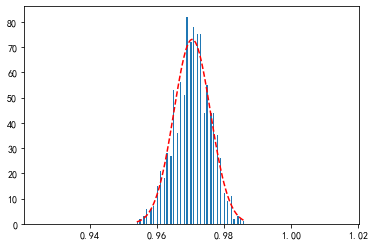

In [160]:
#这个图是50人的
import matplotlib
import scipy.stats as stats
import numpy as np
results = multi_fixed_simulation(50,1000,1000)
mu = np.mean(results[0])
std = np.std(results[0])
print(std)
Bin = 80
n, bins, patches = plt.hist(results[0], bins = Bin)
y = stats.norm.pdf(bins,mu,std)
plt.xlim((birthdayCheck(50)-0.05, birthdayCheck(50)+0.05)) 
plt.plot(bins,y,'r--')
plt.show()

当人数变多的时候,正态函数变尖

In [152]:
results = multi_fixed_simulation(10,1000,1000)

0
100
200
300
400
500
600
700
800
900


0.01038082000614595


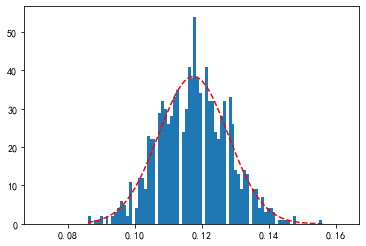

In [156]:
#这个图是十个人的
import matplotlib
import scipy.stats as stats
import numpy as np

mu = np.mean(results[0])
std = np.std(results[0])
print(std)
Bin = 80
n, bins, patches = plt.hist(results[0], bins = Bin)
y = stats.norm.pdf(bins,mu,std)
plt.xlim((birthdayCheck(10)-0.05, birthdayCheck(10)+0.05)) 
plt.plot(bins,y,'r--')
plt.show()

### 证明:
对于求频数的每一个1000次中的任意一次,在人数固定的情况下,存在两个人生日相同的概率一致

于是这1000次就变成了一个标准的二项分布,而二项分布可以大致近似为正态分布

这1000次中,每一次存在两个人生日相同的概率为(假设人数为x)
$$1 - \frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \dots \times \frac{365-n+1}{365} = 1- \frac{1}{365}\Pi_{i=1}^{n-1}\frac{365-n+1}{365}$$
这个式子是二项分布的p

至于n,是我们自己定的,暂时定为1000,是因为每求一次频数就需要做1000次模拟

拟合出的正态分布均值为预期概率,也就是

$$1 - \frac{365}{365} \times \frac{364}{365} \times \frac{363}{365} \times \dots \times \frac{365-x+1}{365} = 1- \frac{1}{365}\Pi_{i=1}^{x-1}\frac{365-i+1}{365}$$

方便起见,把上述式子记为f(x)

拟合出的正态分布标准差为 

$$\sqrt{1000\times f(x) \times (1-f(x))}$$

如果话函数图的话就是

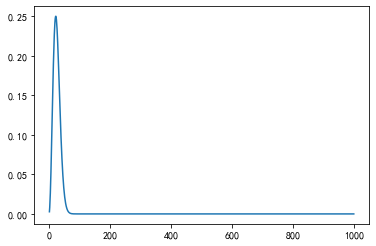

In [165]:
a = np.arange(2,1000)
b = list()
for i in a:
    b.append(birthdayCheck(i)*(1-birthdayCheck(i)))
plt.plot(a,b)

再次确认,把人数定到100,标准差应该可以忽略不计,(计算量和时间考虑没定太大)

0.0
1.0


D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1870: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


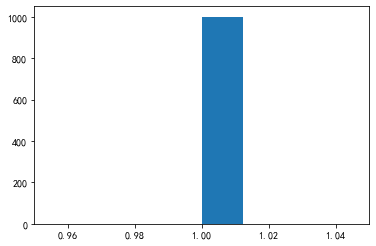

In [170]:
#这个图是100人的
import matplotlib
import scipy.stats as stats
import numpy as np
#results = multi_fixed_simulation(100,1000,1000)
mu = np.mean(results[0])
std = np.std(results[0])
print(std)
print(mu)
Bin = 80
n, bins, patches = plt.hist(results[0], bins = Bin)
y = stats.norm.pdf(bins,mu,std)
plt.xlim((birthdayCheck(100)-0.05, birthdayCheck(100)+0.05)) 
plt.plot(bins,y,'r--')
plt.show()

## 进一步更改人数
方便起见,还是先封装函数

In [164]:
def multi_varied_simulation(people_max,times):
    results = list()
    for i in range(2,people_max):
        results.append(get_ratio(i,times))
    return results
print(multi_varied_simulation(30,10000))

[0.0036, 0.0082, 0.0188, 0.027, 0.041, 0.0546, 0.0713, 0.0921, 0.1185, 0.1418, 0.1668, 0.1946, 0.2237, 0.2507, 0.2835, 0.3088, 0.351, 0.382, 0.4164, 0.4427, 0.4752, 0.5107, 0.5409, 0.5643, 0.5942, 0.6352, 0.6508, 0.6826]


In [171]:
people_num  = 100
def check(people_max):
    results = list()
    for i in range(2,people_max):
        a= birthdayCheck(i)
        results.append(a)
    return results
print(check(people_num))

[0.002739726027397249, 0.008204165884781456, 0.016355912466550326, 0.02713557369979369, 0.04046248364911165, 0.05623570309597559, 0.07433529235166925, 0.09462383388916695, 0.1169481777110779, 0.14114137832173335, 0.1670247888380647, 0.19441027523242982, 0.22310251200497344, 0.2529013197636867, 0.28360400525285023, 0.3150076652965609, 0.3469114178717895, 0.37911852603153684, 0.41143838358058016, 0.4436883351652059, 0.4756953076625502, 0.5072972343239855, 0.5383442579145289, 0.568699703969464, 0.598240820135939, 0.6268592822632421, 0.6544614723423995, 0.680968537477777, 0.7063162427192686, 0.7304546337286438, 0.7533475278503207, 0.774971854175772, 0.7953168646201543, 0.8143832388747152, 0.8321821063798795, 0.8487340082163846, 0.8640678210821209, 0.878219664366722, 0.891231809817949, 0.9031516114817354, 0.9140304715618692, 0.9239228556561199, 0.9328853685514263, 0.9409758994657749, 0.9482528433672547, 0.9547744028332993, 0.9605979728794224, 0.9657796093226765, 0.9703735795779884, 0.974431

### 可视化:

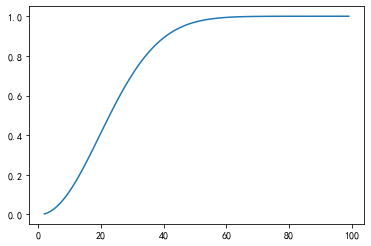

In [172]:
x = list()
for i in range(2,people_num):
    x.append(i)
plt.plot(x,check(people_num))